# Importing the required modules

In [37]:
# Module used for handling the file system.
import os

# Modules used for data handling and linear algebra.
import numpy as np
import pandas as pd

# Modules used for python utilities
from collections import Counter
import random as r

# Modules used for data visualisation.
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
sns.set_style("whitegrid")

# Utility Functions

## Random Colour Generator

In [41]:
def get_random_colours(n : int):
    all_colors = list(clr.CSS4_COLORS.keys())
    if len(all_colors) >= n:
        return r.sample(all_colors,n)
    else:
        return r.sample(all_colors,n//4)

# Structure of the dataset

In [58]:
class Metadata:
    
    def __init__(self, dataset_dir : str):
        self.PARENT = dataset_dir
        self.all_files = []
        self.CLASSES = ["Bulk","Video","Web","Interactive","Idle"]
        self.classwise_duration = [3599, 4496, 4203, 8934, 6341]
    
    def __extract_class_from_filename(self, filename):
        return filename.split("_")[0]
    
    def __get_size_of_file(self,filename):
        abs_path = os.path.join(self.PARENT, filename)
        return os.path.getsize(abs_path)
    
    def class_distribution_network_traces(self):
        self.all_files = os.listdir(self.PARENT)
        self.file_sizes = list(map(self.__get_size_of_file,self.all_files))
        class_labels_foreach_file = list(map(self.__extract_class_from_filename, 
                                             self.all_files))
        self.network_trace_count = Counter(class_labels_foreach_file)
    
    def datatype_of_cols(self):
        sample_data = pd.read_csv(os.path.join(self.PARENT, 
                                               self.all_files[0]))
        self.dtypes = Counter([str(sample_data[i].dtype) for i in sample_data.columns])
    
    def summary(self):
        self.class_distribution_network_traces()
        self.datatype_of_cols()
        rows = 2
        columns = 2
        c = 0
        fig, axs = plt.subplots(rows, columns,figsize=(15,15))
        axs[0,0].bar(x = list(self.network_trace_count.keys()),
                     height = list(self.network_trace_count.values()),
                     color = get_random_colours(3),
                     edgecolor = "black")
        axs[0,0].set_title("Network Trace Classwise Count")
        axs[0,1].hist(self.file_sizes,
                      color = "crimson",
                      edgecolor = "black")
        axs[0,1].set_title("Network Trace File Sizes")
        axs[1,0].bar(x = self.CLASSES,
                     height = self.classwise_duration,
                     color = get_random_colours(3))
        axs[1,0].set_title("Classwise Duration of Data")
        axs[1,1].bar(x = list(self.dtypes.keys()),
                     height = list(self.dtypes.values()),
                     edgecolor = "black",
                     color = get_random_colours(3))
        axs[1,1].set_title("Types of Columns in the Dataset")
        fig.suptitle("Network Trace Dataset Insights")
        plt.subplots_adjust(bottom=0.5, top=0.93, hspace=0.5)
        plt.show()

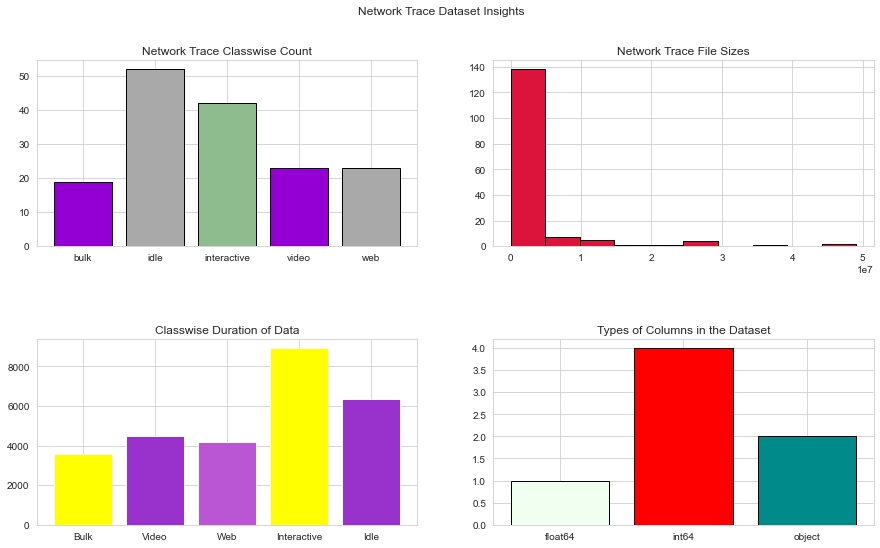

In [59]:
Metadata("../data/network-data").summary()

From the <i>subplot</i> we can make following inferences:
- There is <b>imbalance</b> in the dataset for classes with <b>idle traffic</b> having the <b>highest</b> network trace files while <b>bulk traffic</b> having the <b>lowest</b>. However, <b>bulk traffic</b> has the <b>highest</b> file size which might result in more network trace data for that class.
- The dataset has the <b>highest</b> amount of duration for <b>interactive traffic</b> followed by idle traffic.
- Lastly, the dataset is <b>dominated</b> with <b>integer</b> values which resemble <i>payload and port numbers for the source and destination</i> followed by <b>text</b> columns representing the <i>source and destination addresses</i>.